In [1]:
import sys
sys.path.append("../") # go to parent dir

from pathlib2 import Path
import matplotlib
import random
from load_data import load_data
from test_instances.ts_test import TSTest
from test_instances.fair_sd_ts_test import FairSDTest
from test_instances.sd_ts_test import SDTest
import numpy as np
import pickle


import os
import plot.plot_data_seperated as plt_sep

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})


def plot_all(test_cases):
    plt_sep.plot_delta_subjective_fair(test_cases)
    plt_sep.plot_subjective_min_e1(test_cases)
    plt_sep.plot_delta_smooth_fair(test_cases)
    plt_sep.plot_min_e1(test_cases)
    plt_sep.plot_average_total_regret(test_cases)
    plt_sep.plot_fairness_regret(test_cases)


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [48]:

def plot_average_total_regret(test_cases, start_index=0, end_index=-1):

    T = test_cases[0].T
    x = range(T)
    if end_index == -1:
        end_index = T
    for test in test_cases:
        ds_name = test.bandits.data_set_name
    
        if test.name == 'Fair SD TS':

            for e2_ind, e2 in enumerate(test.e2_arr):
                for delta_ind, delta in enumerate(test.delta_arr):
                    if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION):

                        algo_name = test.get_label_name(delta=delta, e2=e2)
                        y = test.average_regret[e2_ind, delta_ind]
                        explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                        if (explore_end_x < T) and (explore_end_x < end_index):
                            plt.plot(x[start_index:end_index], y[start_index:end_index], label=algo_name, marker='o', markevery=[int(explore_end_x)])
                        else:
                            plt.plot(x[start_index:end_index], y[start_index:end_index], label=algo_name)
        else:
            algo_name = test.get_label_name()
            plt.plot(x[start_index:end_index], test.average_regret[start_index:end_index], label=algo_name)

    plt.xlabel('$T$')
    plt.ylabel('Total Regret')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    name = 'total_regret{}'.format(T)
    save_plot(name)
    plt.show()
    

def plot_fairness_regret(test_cases, start_index=0, end_index=-1, c=0):

    T = test_cases[0].T
    x = range(T)
    if end_index == -1:
        end_index = T
    for test in test_cases:
        ds_name = test.bandits.data_set_name

        if test.name == 'Fair SD TS':
            for e2_ind, e2 in enumerate(test.e2_arr):
                for delta_ind, delta in enumerate(test.delta_arr):
                    if ALL or (e2 in E2_SELECTION and delta in DELTA_SELECTION):

                        algo_name = test.get_name(e2=e2, delta=delta)
                        y = np.add.accumulate(test.average_fairness_regret[e2_ind][delta_ind])
                        explore_end_x = test.average_rounds_exploring[e2_ind, delta_ind]
                        if (explore_end_x < T) and (explore_end_x < end_index):
                            plt.plot(x[start_index:end_index], y[start_index:end_index], label=algo_name, marker='o', markevery=[int(explore_end_x)])
                        else:
                            plt.plot(x[start_index:end_index], y[start_index:end_index], label=algo_name)
        else:
            algo_name = test.get_name()
            plt.plot(x[start_index:end_index], np.add.accumulate(test.average_fairness_regret)[start_index:end_index], label=algo_name)
    axes = plt.gca()

    if fix_y:               
        axes.set_ylim([ymin,ymax])
    else:
        axes.relim()
        # update ax.viewLim using the new dataLim
        axes.autoscale_view()
#         axes.set_yscale('log')

    if c:
        plt.plot(x[start_index:end_index], [c*pow(test_cases[0].k * t, 2. / 3) for t in x][start_index:end_index], linestyle=':', color='k', label='fairness regret bound O((k*T)^2/3)')
    plt.xlabel('$T$')
    plt.ylabel('Cumulative Fairness Regret')


    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    name = 'cumulative_fairness_regret{}'.format(T)
    save_plot(name)
    plt.show()


In [65]:
def get_tests(folder):
    ts_test = np.empty(4, dtype=object)
    sd_ts_test = np.empty(4, dtype=object)
    fair_sd_ts_test = np.empty(4, dtype=object)
    for i in range(4):
        ts_test[i] = []
        sd_ts_test[i] = []
        fair_sd_ts_test[i] = []
    for file in os.listdir("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder):
        if file.endswith(".file"):
            with open(os.path.join("/Users/antonm/PycharmProjects/Fairness_in_Bandits/"+folder, file), "rb") as f:
                test = pickle.load(f) 
                if test.T >= end_index and test.n_iter == n_iter:
                    if test.bandits.data_set_name == 'D0':
                        d = 0
                    elif test.bandits.data_set_name == 'D1':
                        d = 1
                    elif test.bandits.data_set_name == 'D2':
                        d = 2
                    elif test.bandits.data_set_name == 'D3':
                        d = 3
                    if test.name == 'TS':
                        ts_test[d].append(test)
                    elif test.name == 'SD  TS' or test.name == 'SD TS':
                        sd_ts_test[d].append(test)

                    elif test.name == 'Fair SD TS':
                        fair_sd_ts_test[d].append(test)

                    else:
                        print 'unknwown test name'
                        
    for i in range(4):
        fair_sd_ts_test[i].sort(key=lambda x: (x.e2_arr[0], x.delta_arr[0]), reverse=False)
    return ts_test, sd_ts_test, fair_sd_ts_test

def plot_regrets(d, fr=True, r=True, ts=1, sd=1, fair=1, c=0):
    test_cases = []
    if ts:
        test_cases += ts_test[d] 
    if sd:
        test_cases += sd_ts_test[d] 
    if fair:
        test_cases += fair_sd_ts_test[d] 

    if False:
        plot_fairness_regret(test_cases, start_index=start_index, end_index=end_index, c=c)
    if True:
        plot_average_total_regret(test_cases, start_index=start_index, end_index=end_index)

    
    

In [4]:
T = 10000
n_iter = 100.
start_index = 0 
end_index=T
folder_normal = 'normal_objects/new_normal_objects/'+str(T)

In [24]:
ts_test, sd_ts_test, fair_sd_ts_test = get_tests(folder_normal)


In [44]:
ALL = 0
ALL_E1 = True 
E1_SELECTION = []
E2_SELECTION = [0.1, 0.2] #0.02
DELTA_SELECTION = [0.01, 0.2]
LEAVE_OUT = [] #[(0.05,0.3) ]



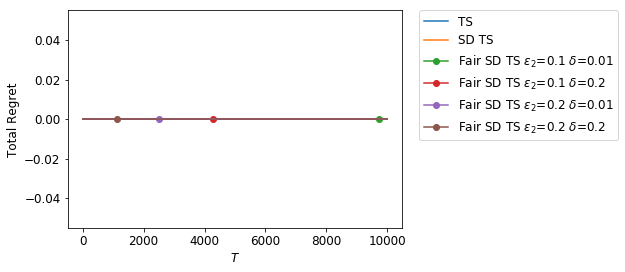

In [66]:
fix_y = True              
ymin = 0
ymax = 1200
plot_regrets(0, ts=1, c=1)

Exceptional case: Fairness and Utility not contradicting. Variances are equal - > selectionh hapens based on mean (TS)

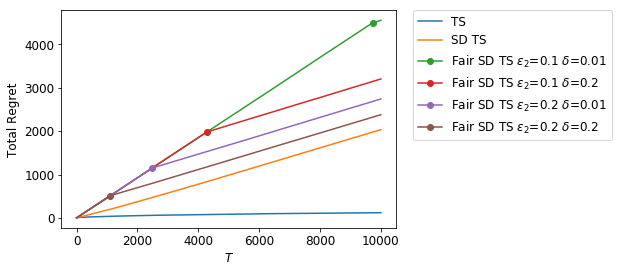

In [67]:
fix_y = True              
ymin = 0
ymax = 4000

plot_regrets(1, ts=1, c=3)

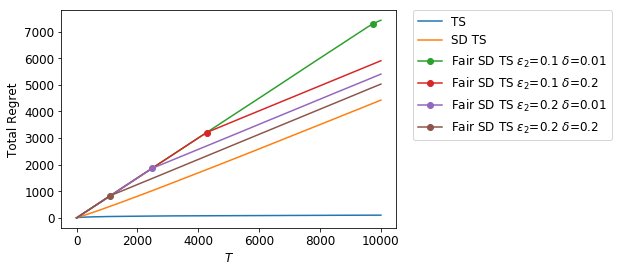

In [68]:
fix_y = True              
ymin = 0
ymax = 3500

plot_regrets(2, ts=1, c=2.5)

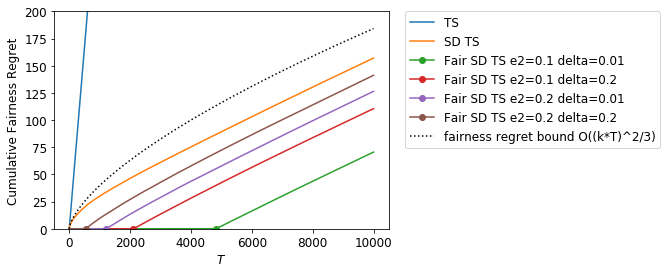

In [64]:
fix_y = True              
ymin = 0
ymax = 200

plot_regrets(3, ts=1, c=0.25)

In [ ]:
np.sum(fair_sd_ts_test[3][0].average_fairness_regret)/fair_sd_ts_test[3][0].average_rounds_exploring 

In [ ]:
print fair_sd_ts_test[3][0].delta_arr
print fair_sd_ts_test[3][0].e2_arr

In [38]:
ts_test[0][0].average_regret

array([0., 0., 0., ..., 0., 0., 0.])

array([ 0.5, -1. ,  1. ,  0.5])